## 보스턴 부동산 가격 예측 with Linear Regression

         마찬가지로 입문할 때 널리 쓰이는 dataset.
         간단하게 해보자.
         
 - sklearn.datasets 에서 load_boston을 통해 불러올 수 있음.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

sns.set()
%matplotlib inline

In [33]:
# 모듈을 통해 load한 후
boston_data = load_boston()

# DataFrame으로 변환. 
bostonDf = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)

# target 변수 (Y) 지정.
bostonDf['Price'] = boston_data.target

# 제대로 불러와졌는지 head를 통해 확인.
bostonDf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [34]:
# 사용할 DF 형태 확인.
bostonDf.shape

(506, 14)

In [35]:
# 사용할 DF의 정보 확인.
bostonDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [36]:
# 기술통계량을 한번 확인해보자.
bostonDf.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [49]:
# 이제 이 데이터를 X, Y들로 나눠준다.
# X : target(Price)을 제외한 나머지 컬럼
# Y : target(Price)
X = bostonDf.iloc[:, :-1]
Y = bostonDf['Price']

# 나눈 데이터를 train_test_split()을 통해 8:2로 나눔.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [50]:
# 선형회귀 모델을 만들어 학습한다.
myModel = LinearRegression()
myModel.fit(X_train, Y_train)

LinearRegression()

In [51]:
# 학습된 모델에 대해 test를 넣고
Y_pred = myModel.predict(X_test)

# MSE를 계산.
MSE = mean_squared_error(Y_test, Y_pred)

# RMSE도 한번 계산.
RMSE = np.sqrt(MSE)

print('MSE : ', MSE)
print('RMSE : ', RMSE)

MSE :  21.362891830221624
RMSE :  4.622000847059812


* 정확도가 그닥 좋아보이지 않는다.
* 값들의 Scaling을 통해 다시 학습해보자.

In [52]:
from sklearn import preprocessing # 전처리 모듈.

X2 = bostonDf.iloc[:, :-1]
# StandardScaler를 통해 정규화 스케일링 진행.
# MSE가 너무 크게 나왔음. MinMaxScaler로 써보자.
X2 = preprocessing.MinMaxScaler().fit(X2).transform(X2)
Y2 = bostonDf['Price']

# 그 후 다시 train/test split.
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.2)

In [53]:
# 모델을 다시 만들어 학습.
scaledModel = LinearRegression()
scaledModel.fit(X2_train, Y2_train)

LinearRegression()

In [54]:
# 수정된 모델에 대해 test를 넣고
Y2_pred = myModel.predict(X2_test)

# MSE를 계산.
MSE = mean_squared_error(Y2_test, Y2_pred)

# RMSE도 한번 계산.
RMSE = np.sqrt(MSE)

print('MSE : ', MSE)
print('RMSE : ', RMSE)

MSE :  171.2280128491903
RMSE :  13.085412215486002


**?? 왜 오차가 더 커졌지??????**
- https://stackoverflow.com/questions/61458289/mean-squared-error-is-enormous-when-using-scikit-learn
- MinMaxScaler를 써보라고 한다.
- StandardScaler 쓴것보단 MSE가 많이 줄긴했다. 그래도 더 큰데...


## 보스턴 부동산 가격 데이터 EDA

#### 상관분석

Text(0.5, 1.0, 'Correlation of Features')

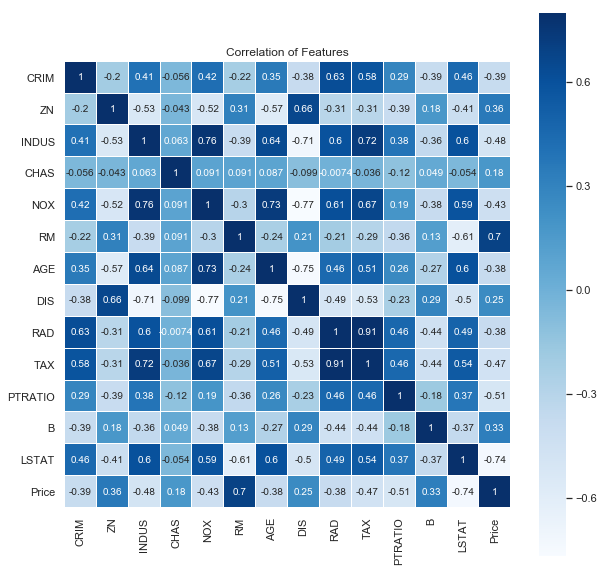

In [56]:
# DataFrame.corr()를 통해 상관행렬을 얻을 수 있음.
corr = bostonDf.corr()
# print(corr)
# 근데 행렬보단 다른 방법으로 보는게 더 직관적.
# heatmap으로 상관행렬을 시각화 하자.
plt.figure(figsize=(10, 10))
sns.heatmap(corr,
           vmax = 0.8,
           linewidth = 0.01,
           square = True,
           annot = True,
           cmap = 'Blues')
plt.title('Correlation of Features')

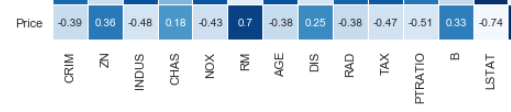
- 이 부분만 놓고 보면 대략적인 상관관계를 확인할수 있음.

강한 양의 상관관계를 같는 Price-RM(평균 방의 개수)을 regplot을 통해 한번 봐보자.

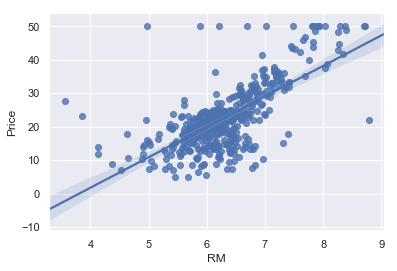

In [57]:
sns.regplot(data=bostonDf, x='RM', y='Price')

강한 음의 상관관계를 같는 Price-LSTAT(저소득층의 비율)을 regplot을 통해 한번 봐보자.

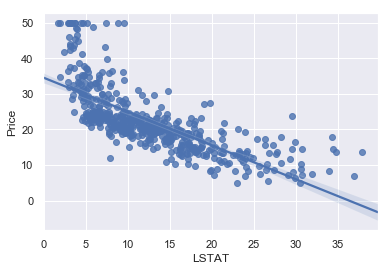

In [58]:
sns.regplot(data=bostonDf, x='LSTAT', y='Price')

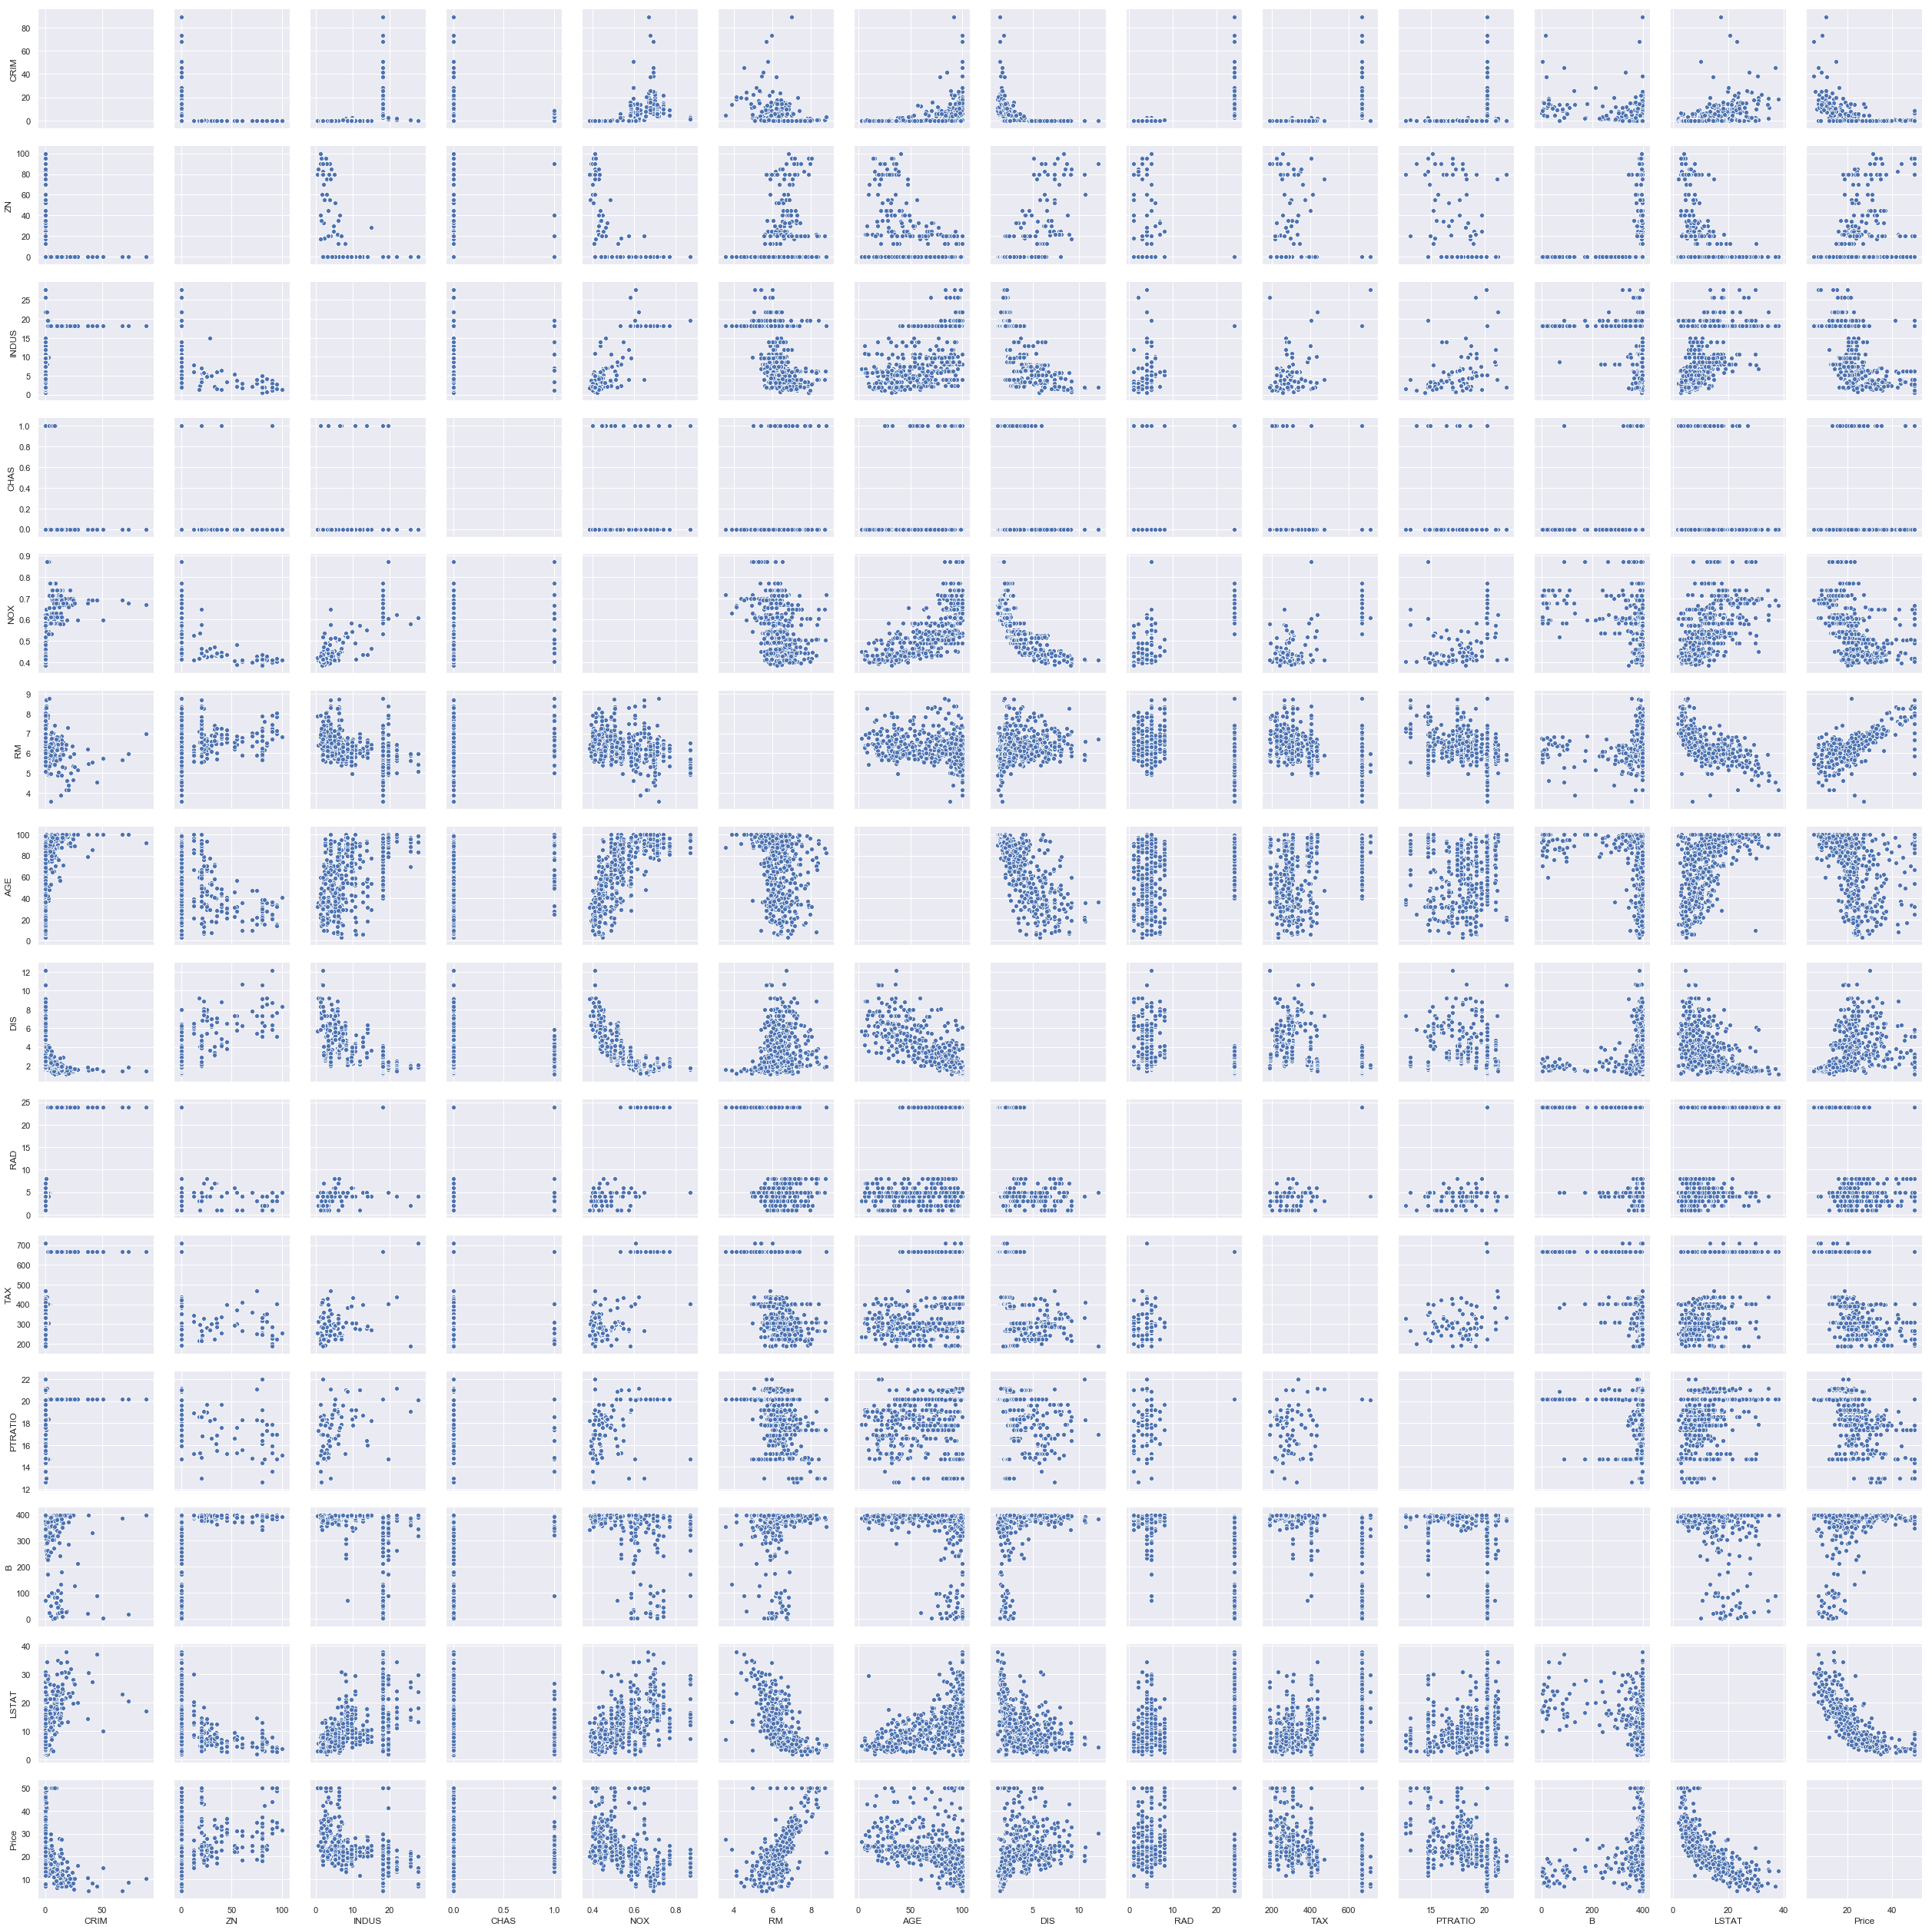

In [62]:
# sns.pairplot을 통해 heatmap의 수치가 아닌 그래프 형태로 확인할 수도 있음.
# pairplot(DataFrame, diag_kind = '그릴 그래프 형태', hue = '그룹 구분 변수', markers='마커 종류')
# 그래프 형태 종류 : reg(regplot), kde(hist가 아닌 밀도선)
sns.pairplot(bostonDf, diag_kind = 'reg')
plt.show()

- 변수가 너무 많아 그리는데 시간이 오래걸리는 거였다... 크기도 작다 ㅋㅋㅋㅋ